In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns # a visualization library from matplotlib
from math import sin, cos, sqrt, atan2, radians
import json
import pprint
import ast

In [2]:
Course_df = pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/18-19-spring-course.xlsx") #course list
TA_df =pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/18-19-spring-ta.xlsx") # TA preference list

In [3]:
course_n_rows, course_n_columns = Course_df.shape  # get the shape of dataframe
print("Shape of course dataframe is")
print("number of rows: {}, number of columns: {}".format(course_n_rows, course_n_columns))

Shape of course dataframe is
number of rows: 117, number of columns: 9


In [4]:
n_rows, n_columns = TA_df.shape  # get the shape of dataframe
print("Shape of TA dataframe is")
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

Shape of TA dataframe is
number of rows: 334, number of columns: 11


## Brief preview of both TA and Course preference lists

In [5]:
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
0,NaN,NaN,NaN,NaN,Grad Program,NaN,NaN,NaN,NaN
1,20001.0,ADP MATH 101-102,0,0,ME,125.0,20.0,1-Kadriye Kahraman ( 71521 ) (20 / 20)\n1-Cans...,"Kadriye Kahraman (71521, BIO, 20 hours)\nHande..."
2,20002.0,ADP NS 101-102,0,0,ME,95.0,20.0,1-Sezgi Biyiklioglu ( 71642 ) (20 / 20)\n1-Tug...,"Ozan Toyran (71485, PHYS, 20 hours)\nTugdem Mu..."
3,20480.0,BIO 301,0,Intro. to Molecular Biology,NaN,30.0,20.0,1-Yunus Akkoc ( 71563 ) (10 / 10)\n1-Zeynep Co...,"Yunus Akkoc (71563, BIO, 10 hours)\nSinem Sari..."
4,20484.0,BIO 308,0,Plant Physiology,NaN,20.0,20.0,1-Yunus Akkoc ( 71563 ) (10 / 10)\n1-Zeynep Co...,"Hatice Cakir (71763, BIO, 10 hours)\nHamza Yus..."


In [6]:
TA_df.head()

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,18282,Abdolali \nKhalili Sadaghiani,PHD,ME,20,20,1- ME 309 (20 / 20),ME 309,20654.0,NaN,NaN
1,24375,Abdul Rahman \nDabbour,MS,ME,20,20,NaN,MATH 306,21124.0,NaN,NaN
2,16440,Abdulkadir \nUzun,MS,EE,10,10,1- EE 406 (5 / 5)\n2- MATH 101 (165 / 140)\n3-...,EE 306,20541.0,\nEE 406,20688.0
3,27191,Abdurrahim Can\nEgil,MS,MAT,20,20,1- NS 102 (300 / 54)\n2- BIO 301 (30 / 20)\n3-...,ENS 205,21148.0,NaN,NaN
4,14277,Abdurrahman \nBurak,PHD,EE,10,10,1- EE 200 (50 / 10)\n2- EE 202 (20 / 45)\n3- E...,EE 200,21155.0,NaN,NaN


## Data types for TA & Courses dataframes

In [7]:
Course_df.dtypes

CRN                          float64
Name                          object
Section                       object
Title                         object
Preferred                     object
Hours Assigned               float64
Hours Requested              float64
Requesting Teaching Grads     object
Assigned Teaching Grads       object
dtype: object

In [8]:
TA_df.dtypes 

Student ID             int64
Name                  object
Degree                object
Program               object
Hours Assigned         int64
Hours Requested        int64
Requested Courses     object
Assigned Course 1     object
CRN 1                float64
Assigned Course 2     object
CRN 2                float64
dtype: object

## Dealing with Dirty Data

In [9]:
# TA dataframe first
TA_df = TA_df.fillna(0) # NaN values are cumbersome values. Change all to 0
TA_df['CRN 1'] = TA_df['CRN 1'].astype('int64') # CRN values are actually integer values. However , they are float in the file
# Change the CRN 1 column value type to int as expected
TA_df['CRN 2'] = TA_df['CRN 2'].astype('int64')
#Change the CRN 2 column value type to int as expected
TA_df['Name'] = TA_df['Name'].replace('\n',' ', regex=True)
TA_df['Assigned Course 2'] = TA_df['Assigned Course 2'].replace('\n',' ', regex=True)

In [10]:
TA_df.head()

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,18282,Abdolali Khalili Sadaghiani,PHD,ME,20,20,1- ME 309 (20 / 20),ME 309,20654,0,0
1,24375,Abdul Rahman Dabbour,MS,ME,20,20,0,MATH 306,21124,0,0
2,16440,Abdulkadir Uzun,MS,EE,10,10,1- EE 406 (5 / 5)\n2- MATH 101 (165 / 140)\n3-...,EE 306,20541,EE 406,20688
3,27191,Abdurrahim Can Egil,MS,MAT,20,20,1- NS 102 (300 / 54)\n2- BIO 301 (30 / 20)\n3-...,ENS 205,21148,0,0
4,14277,Abdurrahman Burak,PHD,EE,10,10,1- EE 200 (50 / 10)\n2- EE 202 (20 / 45)\n3- E...,EE 200,21155,0,0


In [11]:
# Course dataframes turn
Course_df = Course_df.fillna('0') # replace all NaN values with 0
Course_df = Course_df.drop(Course_df.index[0])
Course_df['CRN'] = Course_df['CRN'].astype('int64')
Course_df['Hours Assigned'] = Course_df['Hours Assigned'].astype('int64')
Course_df['Hours Requested'] = Course_df['Hours Requested'].astype('int64')
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
1,20001,ADP MATH 101-102,0,0,ME,125,20,1-Kadriye Kahraman ( 71521 ) (20 / 20)\n1-Cans...,"Kadriye Kahraman (71521, BIO, 20 hours)\nHande..."
2,20002,ADP NS 101-102,0,0,ME,95,20,1-Sezgi Biyiklioglu ( 71642 ) (20 / 20)\n1-Tug...,"Ozan Toyran (71485, PHYS, 20 hours)\nTugdem Mu..."
3,20480,BIO 301,0,Intro. to Molecular Biology,0,30,20,1-Yunus Akkoc ( 71563 ) (10 / 10)\n1-Zeynep Co...,"Yunus Akkoc (71563, BIO, 10 hours)\nSinem Sari..."
4,20484,BIO 308,0,Plant Physiology,0,20,20,1-Yunus Akkoc ( 71563 ) (10 / 10)\n1-Zeynep Co...,"Hatice Cakir (71763, BIO, 10 hours)\nHamza Yus..."
5,20487,BIO 310,0,Introduction To Bioinformatics,0,30,15,1-Halise Busra Cagirici ( 71618 ) (10 / 10)\n3...,"Afshan Nabi (71923, CS, 20 hours)\nHalise Busr..."


## How many TA's requested for each course ?

In [12]:
for courses in range(1,course_n_rows) :
    data_temp = Course_df.at[courses,'Requesting Teaching Grads']
    if  data_temp != "0" :
        data = Course_df.at[courses,'Requesting Teaching Grads'].splitlines()
        print(Course_df.at[courses,'Name'] , "requested" ,len(data),"TA's")

ADP MATH 101-102 requested 11 TA's
ADP NS 101-102 requested 3 TA's
BIO 301 requested 8 TA's
BIO 308 requested 8 TA's
BIO 310 requested 4 TA's
BIO 330 requested 3 TA's
BIO 335 requested 3 TA's
BIO 467 requested 11 TA's
CHEM 202 requested 4 TA's
CHEM 302 requested 3 TA's
CHEM 405 requested 6 TA's
CS 100 requested 6 TA's
CS 201 requested 28 TA's
CS 204 requested 14 TA's
CS 210 requested 6 TA's
CS 300 requested 15 TA's
CS 301 requested 11 TA's
CS 305 requested 4 TA's
CS 306 requested 7 TA's
CS 308 requested 8 TA's
CS 310 requested 7 TA's
CS 401 requested 5 TA's
CS 403 requested 2 TA's
CS 406 requested 3 TA's
CS 407 requested 1 TA's
CS 432 requested 8 TA's
CS 515 requested 8 TA's
EE 200 requested 6 TA's
EE 202 requested 5 TA's
EE 302 requested 2 TA's
EE 306 requested 2 TA's
EE 308 requested 1 TA's
EE 310 requested 2 TA's
EE 312 requested 4 TA's
EE 314 requested 1 TA's
EE 404 requested 4 TA's
EE 406 requested 2 TA's
EE 410 requested 1 TA's
ENS 201 requested 9 TA's
ENS 205 requested 22 TA's
E

In [13]:
for TA in range(1,course_n_rows) :
    if Course_df.at[TA,'Assigned Teaching Grads'] != "None" :
        data = Course_df.at[TA,'Assigned Teaching Grads'].splitlines()
        print(Course_df.at[TA,'Name'] , "assigned" ,len(data),"TA's")
    else :
        print(Course_df.at[TA,'Name'] , "assigned" , 0,"TA's")

ADP MATH 101-102 assigned 8 TA's
ADP NS 101-102 assigned 5 TA's
BIO 301 assigned 3 TA's
BIO 308 assigned 2 TA's
BIO 310 assigned 2 TA's
BIO 330 assigned 1 TA's
BIO 335 assigned 3 TA's
BIO 467 assigned 0 TA's
CHEM 202 assigned 2 TA's
CHEM 302 assigned 2 TA's
CHEM 405 assigned 1 TA's
CS 100 assigned 1 TA's
CS 201 assigned 12 TA's
CS 204 assigned 9 TA's
CS 210 assigned 3 TA's
CS 300 assigned 3 TA's
CS 301 assigned 2 TA's
CS 305 assigned 2 TA's
CS 306 assigned 2 TA's
CS 308 assigned 4 TA's
CS 310 assigned 2 TA's
CS 401 assigned 2 TA's
CS 403 assigned 2 TA's
CS 406 assigned 1 TA's
CS 407 assigned 1 TA's
CS 432 assigned 2 TA's
CS 515 assigned 0 TA's
EE 200 assigned 5 TA's
EE 202 assigned 2 TA's
EE 302 assigned 1 TA's
EE 306 assigned 2 TA's
EE 308 assigned 2 TA's
EE 310 assigned 2 TA's
EE 312 assigned 1 TA's
EE 314 assigned 0 TA's
EE 404 assigned 1 TA's
EE 406 assigned 1 TA's
EE 410 assigned 0 TA's
ENS 201 assigned 4 TA's
ENS 205 assigned 14 TA's
ENS 206 assigned 6 TA's
ENS 208 assigned 5 TA'

## Number of Ta's for each program 

In [14]:
top_programs = TA_df['Program'].value_counts()
print(top_programs)

MAT      66
CS       51
ME       49
BIO      41
MFE      34
IE       32
EE       27
MATH     20
PHYS     13
CYSEC     1
Name: Program, dtype: int64


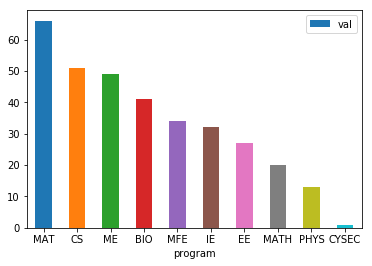

In [15]:
df = pd.DataFrame({'program':['MAT', 'CS', 'ME','BIO','MFE','IE','EE','MATH','PHYS','CYSEC'], 'val':[66, 51, 49,41,34,32,27,20,13,1]})
ax = df.plot.bar(x='program', y='val', rot=0)